<a href="https://colab.research.google.com/github/DustyAlex/Train-Delay-Pred/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing modules and libraries

In [2]:
# Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and metrics

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Preprocessing and utilities

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV



%matplotlib inline

# Reading dataset from DataCamp GitHub url

In [3]:
# Loading dataframe

df=pd.read_csv('https://raw.githubusercontent.com/DustyAlex/Train-Delay-Pred/main/Train_Timings.csv',delimiter=';')

# General Statistics

In [4]:
# Exploring first rows from dataset

df.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2021-02-22,2528,IC 17,SNCB/NMBS,161,08:13:25,08:13:25,08:10:00,08:10:00,205.0,205.0,IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM,GROENENDAAL,161,2021-02-22 00:00:00,2021-02-22,2021-02-22,2021-02-22
1,2021-02-22,2528,IC 17,SNCB/NMBS,26,08:31:12,08:31:12,08:30:00,08:30:00,72.0,72.0,IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM,EVERE,26,2021-02-22 00:00:00,2021-02-22,2021-02-22,2021-02-22
2,2021-02-22,2528,IC 17,SNCB/NMBS,36,08:38:34,08:38:34,08:38:00,08:38:00,34.0,34.0,IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM,DIEGEM,36,2021-02-22 00:00:00,2021-02-22,2021-02-22,2021-02-22
3,2021-02-22,2528,IC 17,SNCB/NMBS,36,08:39:35,08:39:35,08:39:00,08:39:00,35.0,35.0,IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM,ZAVENTEM,36,2021-02-22 00:00:00,2021-02-22,2021-02-22,2021-02-22
4,2021-02-22,1487,L A4-1,SNCB/NMBS,59,16:41:36,16:42:06,16:42:00,16:42:00,-24.0,6.0,L A4-1: SINT-NIKLAAS -> ANTWERPEN-CENTRAAL,BEVEREN(WAAS),59,2021-02-22 00:00:00,2021-02-22,2021-02-22,2021-02-22


In [5]:
# Data types in dataset

pd.DataFrame({'Data Type':df.dtypes})

,Data Type
Date of departure,object
Train number,int64
Relation,object
Railway operator,object
Departure line,object
Actual arrival time,object
Actual departure time,object
Planned arrival time,object
Planned departure time,object
Delay at arrival,float64


In [6]:
# Dataset shape

print('Rows: ',df.shape[0],'\nColumns: ',df.shape[1])

Rows:  72609 
Columns:  18


In [7]:
# Missing Values

missing=pd.DataFrame({'Missing Values':df.isna().sum(),'%Missing Values':round(df.isnull().sum()/df.shape[0]*100,2)})
missing

,Missing Values,%Missing Values
Date of departure,0,0.00
Train number,0,0.00
Relation,0,0.00
Railway operator,0,0.00
Departure line,3522,4.85
Actual arrival time,3526,4.86
Actual departure time,3522,4.85
Planned arrival time,3526,4.86
Planned departure time,3522,4.85
Delay at arrival,3526,4.86


In [8]:
# Some missing values

mask=df.isnull().any(axis=1)
df[mask].head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
5,2021-02-22,1487,L A4-1,SNCB/NMBS,NaN,17:06:09,NaN,17:04:00,NaN,129.0,NaN,L A4-1: SINT-NIKLAAS -> ANTWERPEN-CENTRAAL,ANTWERPEN-CENTRAAL,59/1,2021-02-22 00:00:00,NaN,2021-02-22,NaN
6,2021-02-22,1469,L A4-1,SNCB/NMBS,59/1,NaN,19:56:10,NaN,19:56:00,NaN,10.0,L A4-1: ANTWERPEN-CENTRAAL -> SINT-NIKLAAS,ANTWERPEN-CENTRAAL,NaN,NaN,2021-02-22,NaN,2021-02-22
9,2021-02-22,1469,L A4-1,SNCB/NMBS,NaN,20:24:55,NaN,20:25:00,NaN,-5.0,NaN,L A4-1: ANTWERPEN-CENTRAAL -> SINT-NIKLAAS,SINT-NIKLAAS,59,2021-02-22 00:00:00,NaN,2021-02-22,NaN
17,2021-02-22,4027,IC 27,SNCB/NMBS,36C,NaN,05:47:41,NaN,05:47:00,NaN,41.0,IC 27: BRUSSELS AIRPORT - ZAVENTEM -> CHARLERO...,BRUSSELS AIRPORT - ZAVENTEM,NaN,NaN,2021-02-22,NaN,2021-02-22
25,2021-02-22,4027,IC 27,SNCB/NMBS,NaN,07:21:00,NaN,07:21:00,NaN,0.0,NaN,IC 27: BRUSSELS AIRPORT - ZAVENTEM -> CHARLERO...,CHARLEROI-SUD,124,2021-02-22 00:00:00,NaN,2021-02-22,NaN


In [9]:
# Total missing values in dataset

print('Total missing values in dataset: ',df[mask].shape[0])

Total missing values in dataset:  11317


# Data Cleaning


## Dealing with missing values

The strategy will be extract unique values from columns with missing values and analyze a proper method to impute missing values.

In [10]:
#Exploring departure line and arrival line

op1=df[['Arrival line']].notnull().squeeze()
op2=df[['Departure line']].notnull().squeeze()
total=(op1==op2)
total.sum()

65561

From the above I can conclude that more than 90% of data has the same ```departure line``` and ```arrival line```, so, I can replace missing values with information present in those columns.

In [11]:
# Replacing null values

# Departure line

depline=df['Departure line'].isnull()
df['Departure line'].fillna(df.loc[depline,['Arrival line']].squeeze(),inplace=True)

# Arrival line

arline=df['Arrival line'].isnull()
df['Arrival line'].fillna(df.loc[arline,['Departure line']].squeeze(),inplace=True)

# Checking

df.isnull().sum()

Date of departure            0
Train number                 0
Relation                     0
Railway operator             0
Departure line               0
Actual arrival time       3526
Actual departure time     3522
Planned arrival time      3526
Planned departure time    3522
Delay at arrival          3526
Delay at departure        3522
Relation direction        5109
Stopping place               0
Arrival line                 0
Planned arrival date      3526
Planned departure date    3522
Actual arrival date       3526
Actual departure date     3522
dtype: int64

In [12]:
# Exploring Planned arrival time and Planned departure time

op1=df[['Planned arrival time']].notnull().squeeze()
op2=df[['Planned departure time']].notnull().squeeze()
total=(op1==op2)
total.sum()

65561

From the dataset I can see that most of the records have the same ```Planned arrival time``` and ```Planned departure time```

In [ ]:
# Planned arrival time

mask1=df['Planned arrival time'].isnull()
df['Planned arrival time'].fillna(df.loc[mask1,['Planned departure time']].squeeze(),inplace=True)

# Planned departure time

mask2=df['Planned departure time'].isnull()
df['Planned departure time'].fillna(df.loc[mask2,['Planned arrival time']].squeeze(),inplace=True)

# Checking

df.isnull().sum()

Date of departure            0
Train number                 0
Relation                     0
Railway operator             0
Departure line               0
Actual arrival time       3526
Actual departure time     3522
Planned arrival time         0
Planned departure time       0
Delay at arrival          3526
Delay at departure        3522
Relation direction        5109
Stopping place               0
Arrival line                 0
Planned arrival date      3526
Planned departure date    3522
Actual arrival date       3526
Actual departure date     3522
dtype: int64

In [ ]:
#Create a function to automate previous tasks

def checking_2cols(col1,col2,data):
    '''Check the % of records that 2 columns has in common without missing values'''
    
    op1=data[[col1]].notnull().squeeze()
    op2=data[[col2]].notnull().squeeze()
    total=(op1==op2)
    result=round(total.sum()/data[[col1]].shape[0]*100)
    return print('Total % with common rows: ',result,'%')


def replace_common_rows(col1,col2,data):
    
    '''Replace common values in rows for a pair of columns'''
    
    mask1=data[col1].isnull()
    data[col1].fillna(data.loc[mask1,[col2]].squeeze(),inplace=True)
    

    mask2=data[col2].isnull()
    data[col2].fillna(data.loc[mask2,[col1]].squeeze(),inplace=True)



In [ ]:
# Checking the remaining columns

checking_2cols('Actual arrival time','Actual departure time',df)
checking_2cols('Planned arrival date','Planned departure date',df)
checking_2cols('Actual arrival date','Actual departure date',df)

Total % with common rows:  100 %
Total % with common rows:  100 %
Total % with common rows:  100 %


In [ ]:
# Replacing the remaining columns

replace_common_rows('Actual arrival time','Actual departure time',df)
replace_common_rows('Planned arrival date','Planned departure date',df)
replace_common_rows('Actual arrival date','Actual departure date',df)

# Last check

df.isnull().sum()

Date of departure            0
Train number                 0
Relation                     0
Railway operator             0
Departure line               0
Actual arrival time          0
Actual departure time        0
Planned arrival time         0
Planned departure time       0
Delay at arrival          3526
Delay at departure        3522
Relation direction        5109
Stopping place               0
Arrival line                 0
Planned arrival date         0
Planned departure date       0
Actual arrival date          0
Actual departure date        0
dtype: int64

In [ ]:
# Replacing missing values in Relation direction

df['Relation direction'].fillna('not_given',inplace=True)
df.isnull().sum()

Date of departure            0
Train number                 0
Relation                     0
Railway operator             0
Departure line               0
Actual arrival time          0
Actual departure time        0
Planned arrival time         0
Planned departure time       0
Delay at arrival          3526
Delay at departure        3522
Relation direction           0
Stopping place               0
Arrival line                 0
Planned arrival date         0
Planned departure date       0
Actual arrival date          0
Actual departure date        0
dtype: int64

I will consider the remaining features ```Delay at arrival``` and ```Delay at departure``` as my possible target features, for that reason I will not impute or replace missing values. I will drop all rows with missing values.

In [ ]:
# How many rows I will delete

df.isnull().any(axis=1).sum()

7048

In [ ]:
# Drop missing values

df.dropna(subset=['Delay at arrival','Delay at departure'],inplace=True)

In [ ]:
# Checking if there are duplicate records

df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Date of departure', 'Train number', 'Relation', 'Railway operator',
       'Departure line', 'Actual arrival time', 'Actual departure time',
       'Planned arrival time', 'Planned departure time', 'Delay at arrival',
       'Delay at departure', 'Relation direction', 'Stopping place',
       'Arrival line', 'Planned arrival date', 'Planned departure date',
       'Actual arrival date', 'Actual departure date'],
      dtype='object')

# Fixing formats

In [ ]:
#Fixing time and date formats

mylist=['Date of departure','Actual arrival time','Actual departure time',
       'Planned arrival time', 'Planned departure time','Planned arrival date', 'Planned departure date',
       'Actual arrival date', 'Actual departure date']

for col in mylist:
    df[col]=pd.to_datetime(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65561 entries, 0 to 72608
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date of departure       65561 non-null  datetime64[ns]
 1   Train number            65561 non-null  int64         
 2   Relation                65561 non-null  object        
 3   Railway operator        65561 non-null  object        
 4   Departure line          65561 non-null  object        
 5   Actual arrival time     65561 non-null  datetime64[ns]
 6   Actual departure time   65561 non-null  datetime64[ns]
 7   Planned arrival time    65561 non-null  datetime64[ns]
 8   Planned departure time  65561 non-null  datetime64[ns]
 9   Delay at arrival        65561 non-null  float64       
 10  Delay at departure      65561 non-null  float64       
 11  Relation direction      65561 non-null  object        
 12  Stopping place          65561 non-null  object

# Data Visualization

In [ ]:
df['hour_arrival']=df['Planned arrival time'].dt.hour

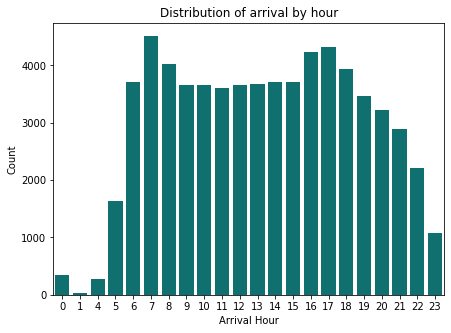

In [ ]:
#Categorial features

df['hour_arrival'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.countplot(x='hour_arrival',data=df,color='teal')

plt.title('Distribution of arrival by hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Count')
plt.show()

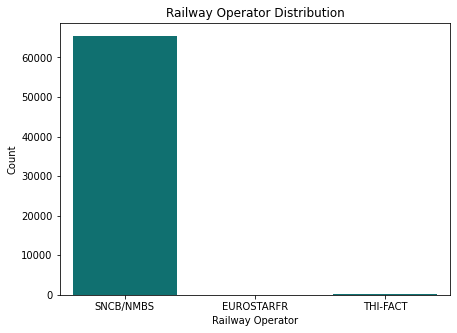

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Railway operator',data=df,color='teal')

plt.title('Railway Operator Distribution')
plt.xlabel('Railway Operator')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Relation direction'].value_counts()[0:6]

not_given                                     4269
IC 25: LIEGE-SAINT-LAMBERT -> MONS            1013
IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID     992
IC 25: MONS -> LIEGE-SAINT-LAMBERT             967
IC 18: BRUSSEL-ZUID -> LIEGE-SAINT-LAMBERT     936
IC 16-1: LUXEMBOURG -> BRUSSEL-ZUID            915
Name: Relation direction, dtype: int64

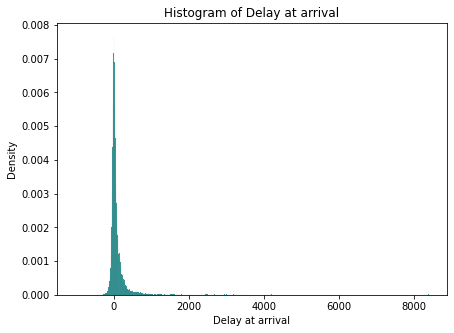

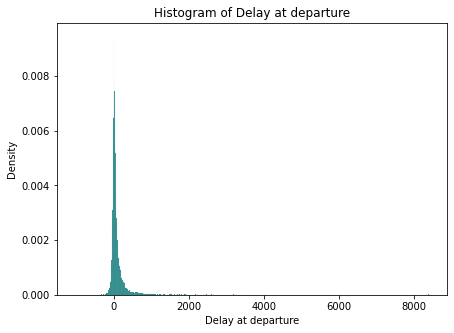

In [ ]:
#Numeric features

plt.figure(figsize=(7,5))
sns.histplot(df['Delay at arrival'],stat='density',color='teal')
plt.title('Histogram of Delay at arrival')
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(df['Delay at departure'],stat='density',color='teal')
plt.title('Histogram of Delay at departure')
plt.show()

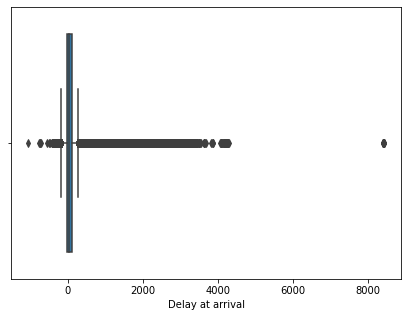

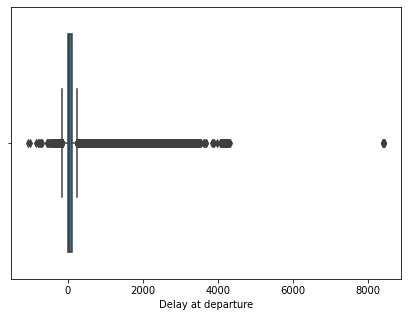

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Delay at arrival',data=df)
plt.show()


plt.figure(figsize=(7,5))
sns.boxplot(x='Delay at departure',data=df)
plt.show()

In [ ]:
# Count of unique values by feature

for col in df.columns:
    print(col,':',df[col].nunique())

Date of departure : 1
Train number : 3510
Relation : 98
Railway operator : 3
Departure line : 116
Actual arrival time : 41698
Actual departure time : 41610
Planned arrival time : 1454
Planned departure time : 1446
Delay at arrival : 2017
Delay at departure : 1963
Relation direction : 199
Stopping place : 591
Arrival line : 119
Planned arrival date : 2
Planned departure date : 2
Actual arrival date : 2
Actual departure date : 2
hour_arrival : 22


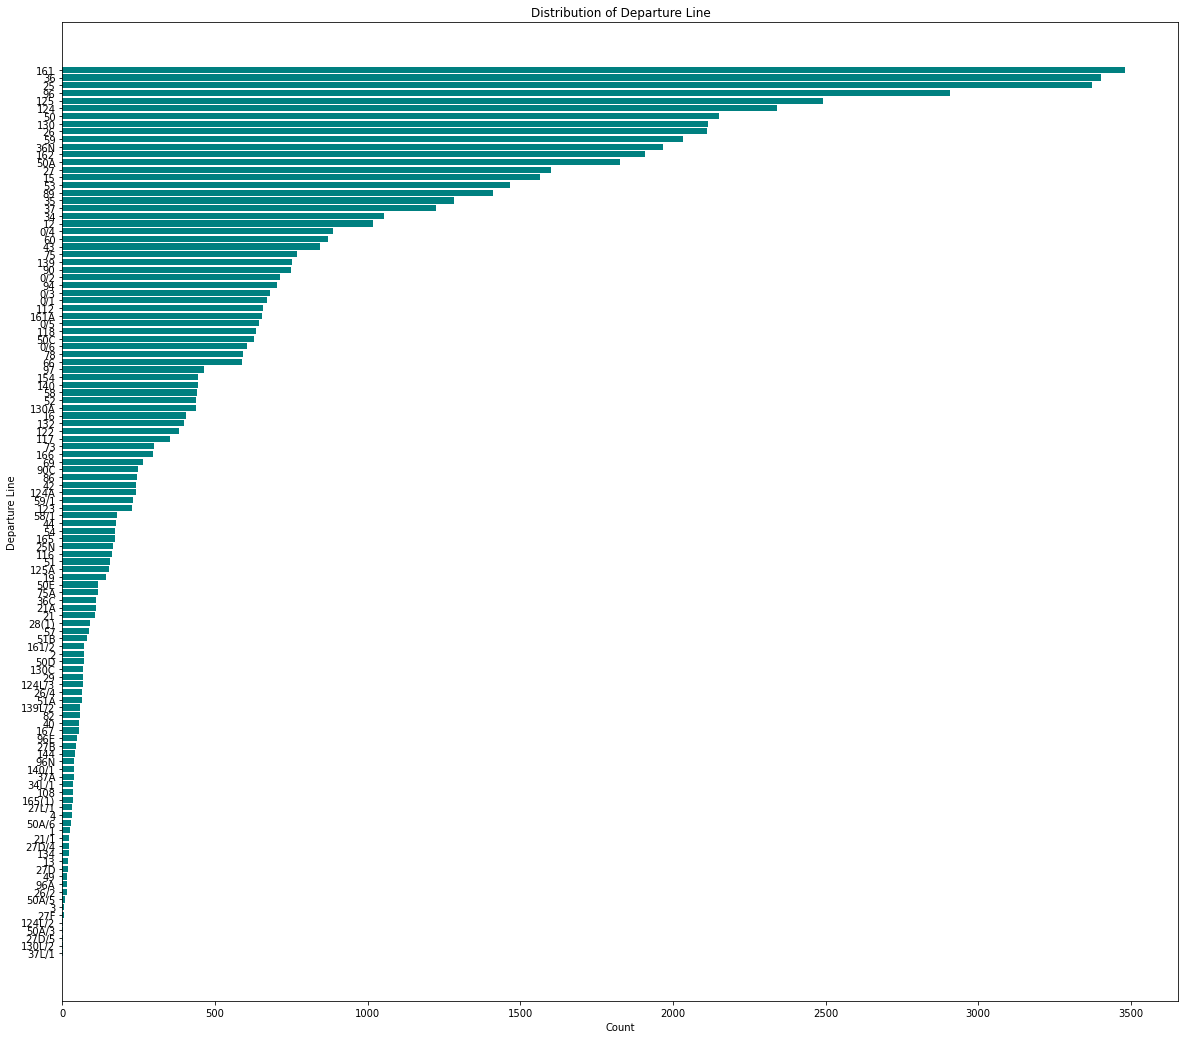

In [ ]:
# Departure line

plt.figure(figsize=(20,18))
plt.barh(df.groupby('Departure line')['Train number'].count().sort_values().index,df.groupby('Departure line')['Train number'].count().sort_values(),color='teal')

plt.title('Distribution of Departure Line')
plt.xlabel('Count')
plt.ylabel('Departure Line')
plt.show()

# Feature Engineering and preprocessing

## Creating new features

In [ ]:
# Count number of trains per railway line

trains_line=pd.DataFrame(df.groupby('Arrival line')['Train number'].count().sort_values()).reset_index()
trains_line.columns=['Arrival line','trains_line']
print(trains_line.head())

df.merge(trains_line,on='Arrival line')

  Arrival line  trains_line
0          26B            1
1          53A            1
2         36/2            1
3        27D/5            2
4       130L/2            2


,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date,hour_arrival,trains_line
0,2021-02-22,2528,IC 17,SNCB/NMBS,161,2022-10-17 08:13:25,2022-10-17 08:13:25,2022-10-17 08:10:00,2022-10-17 08:10:00,205.0,205.0,IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM,GROENENDAAL,161,2021-02-22,2021-02-22,2021-02-22,2021-02-22,8,3477
1,2021-02-22,3987,L B8-1,SNCB/NMBS,161,2022-10-17 16:56:29,2022-10-17 16:56:37,2022-10-17 16:54:00,2022-10-17 16:55:00,149.0,97.0,L B8-1: LOUVAIN-LA-NEUVE -> BRUSSEL-ZUID,RIXENSART,161,2021-02-22,2021-02-22,2021-02-22,2021-02-22,16,3477
2,2021-02-22,3987,L B8-1,SNCB/NMBS,161,2022-10-17 17:01:56,2022-10-17 17:02:56,2022-10-17 17:00:00,2022-10-17 17:01:00,116.0,116.0,L B8-1: LOUVAIN-LA-NEUVE -> BRUSSEL-ZUID,LA HULPE,161,2021-02-22,2021-02-22,2021-02-22,2021-02-22,17,3477
3,2021-02-22,3987,L B8-1,SNCB/NMBS,161,2022-10-17 17:06:48,2022-10-17 17:06:48,2022-10-17 17:05:00,2022-10-17 17:05:00,108.0,108.0,L B8-1: LOUVAIN-LA-NEUVE -> BRUSSEL-ZUID,GROENENDAAL,161,2021-02-22,2021-02-22,2021-02-22,2021-02-22,17,3477
4,2021-02-22,3987,L B8-1,SNCB/NMBS,161,2022-10-17 17:12:28,2022-10-17 17:12:28,2022-10-17 17:11:00,2022-10-17 17:11:00,88.0,88.0,L B8-1: LOUVAIN-LA-NEUVE -> BRUSSEL-ZUID,WATERMAAL,161,2021-02-22,2021-02-22,2021-02-22,2021-02-22,17,3477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65556,2021-02-22,9264,IC 35-1,SNCB/NMBS,4,2022-10-17 21:00:03,2022-10-17 21:03:21,2022-10-17 21:00:00,2022-10-17 21:01:00,3.0,141.0,IC 35-1: AMSTERDAM CENTRAAL -> BRUSSEL-ZUID,NOORDERKEMPEN,4,2021-02-22,2021-02-22,2021-02-22,2021-02-22,21,32
65557,2021-02-22,9692,IC 35-2,SNCB/NMBS,4,2022-10-17 08:00:07,2022-10-17 08:03:13,2022-10-17 08:00:00,2022-10-17 08:01:00,7.0,133.0,IC 35-2: DEN HAAG HOLLANDS SPOOR -> BRUSSEL-ZUID,NOORDERKEMPEN,4,2021-02-22,2021-02-22,2021-02-22,2021-02-22,8,32
65558,2021-02-22,3703,IC 06-2,SNCB/NMBS,36N,2022-10-17 04:16:50,2022-10-17 04:16:50,2022-10-17 04:17:00,2022-10-17 04:17:00,-10.0,-10.0,IC 06-2: MONS -> BRUSSELS AIRPORT - ZAVENTEM,SCHAARBEEK,26B,2021-02-22,2021-02-22,2021-02-22,2021-02-22,4,1
65559,2021-02-22,8009,P,SNCB/NMBS,27D/5,2022-10-17 16:46:41,2022-10-17 16:46:41,2022-10-17 16:48:00,2022-10-17 16:48:00,-79.0,-79.0,not_given,SCHAARBEEK-PERRON VORMING,27D/5,2021-02-22,2021-02-22,2021-02-22,2021-02-22,16,2


In [ ]:
# Rush hour?

mapping={0:"no rush",1:"no rush",4:"no rush",5:"no rush",6:"rush",7:"rush",8:"rush",9:"rush",10:"rush",11:"rush",12:"rush",13:"rush",14:"rush",15:"rush",16:"rush",17:"rush",18:"rush",19:"no rush",20:"no rush",21:"no rush",22:"no rush",23:"no rush"
}

df['rush_hour']=df.hour_arrival.map(mapping)


In [ ]:
# Difference between delays (arrival and departure)

df['difference']=df['Delay at departure']-df['Delay at arrival']

In [ ]:
# Train arrive at same line?

df['same_line']=0

df.loc[df[(df['Arrival line'])==(df['Departure line'])].index,'same_line']=1

## Subsetting dataframe

In [ ]:
# Subsetting dataframe

print(df.columns)

df=df[['Relation','Railway operator','Departure line','Delay at arrival','Delay at departure','hour_arrival','rush_hour', 'difference','same_line']]

Index(['Date of departure', 'Train number', 'Relation', 'Railway operator',
       'Departure line', 'Actual arrival time', 'Actual departure time',
       'Planned arrival time', 'Planned departure time', 'Delay at arrival',
       'Delay at departure', 'Relation direction', 'Stopping place',
       'Arrival line', 'Planned arrival date', 'Planned departure date',
       'Actual arrival date', 'Actual departure date', 'hour_arrival',
       'rush_hour', 'difference', 'same_line'],
      dtype='object')


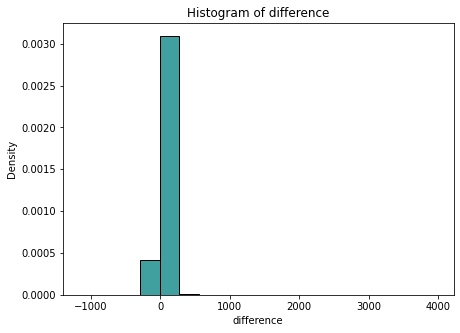

In [ ]:
# Exploring new numeric feature

plt.figure(figsize=(7,5))
sns.histplot(df['difference'],stat='density',color='teal')
plt.title('Histogram of difference')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65561 entries, 0 to 72608
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Relation            65561 non-null  object 
 1   Railway operator    65561 non-null  object 
 2   Departure line      65561 non-null  object 
 3   Delay at arrival    65561 non-null  float64
 4   Delay at departure  65561 non-null  float64
 5   hour_arrival        65561 non-null  int64  
 6   rush_hour           65561 non-null  object 
 7   difference          65561 non-null  float64
 8   same_line           65561 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ MB


In [ ]:
# rename colums

df.columns=['relation','operator','line','delay_arrival','delay_departure','hour_arrival','rush_hour','difference','same_line']

# Change feature type

df.hour_arrival=df.hour_arrival.astype('object')



## Getting dummy variables

In [ ]:
# Getting dummy variables

pd.get_dummies(df,drop_first=True)

df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.shape

(65561, 240)

## Split dataframe into X, y and train/test

In [ ]:
# Split X and y

y=df[['delay_departure']]

X=df.drop(columns=['delay_departure'])



In [ ]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Outlier detection



In [ ]:
# At this point I will define a function to do that task

def modify_outliers_mean(data,features):

  '''
  This function modifies outliers with mean.
  First, the function detects outliers with Z-score, then calculates the mean of
  the feature without outliers,and finally, replaces outliers with the calculated
  mean.
  Parameters:
  -------------------
  data: dataset to be analyzed
  features: List of numerical features in the dataset
  '''

  to_del=[]
  for i in features:

    #Initialize null lists
    ind_upper=[]
    ind_lower=[]
    ind=[]

    #Calculate Z score
    data['Z_score']=(data[i]-data[i].mean())/data[i].std()
    print(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0],' outliers detected for ',i)
    to_del.append(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0])
    
    #Identified outliers
    ind=data[(data['Z_score']>3) | (data['Z_score']<-3)].index
    
    #Calculate mean to replace outlier

    mean_to_replace=data[(data['Z_score']<3) & (data['Z_score']>-3)][i].mean()
    
    #Replacing outliers
    data.loc[ind,i]=mean_to_replace

  print('total outliers modified: ',sum(to_del))
  data.drop(columns='Z_score',inplace=True)

In [ ]:
# Outlier detection with custom function

X_train=pd.DataFrame(data=X_train,columns=df.drop(columns=['delay_departure']).columns)

modify_outliers_mean(X_train,['delay_arrival','difference'])

782  outliers detected for  delay_arrival
426  outliers detected for  difference
total outliers modified:  1208


## Scaling features

In [ ]:
# Scale numerical features

scaler=StandardScaler()

# Fit the scaler

scaler.fit(X_train[['delay_arrival','difference']])

# Tranform data

X_train_tranform=scaler.transform(X_train[['delay_arrival','difference']])
X_test_tranform=scaler.transform(X_test[['delay_arrival','difference']])

# Replace in original data

X_train[['delay_arrival','difference']]=X_train_tranform
X_test[['delay_arrival','difference']]=X_test_tranform

## Principal component analysis


The current number of columns (features) of the ```X_train``` and ```X_test``` is 239. I'm gonna explore PCA in order to reduce dimensionalit of data

In [ ]:
#Initialize PCA. I want to retain 95% of explained variance

pca=PCA(0.95)

# Fit PCA

pca.fit(X_train)

# Number of components

print('Components (features) after running PCA: ',pca.n_components_)



Components (features) after running PCA:  108


In [ ]:
# Transform data

X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

# Modeling

In this step I'm gonna run differente machine learning models, specially CART models.

In [ ]:
# Initialize models

rf=RandomForestRegressor()
xgb=XGBRegressor()
gb=GradientBoostingRegressor()
lr=LinearRegression()

In [ ]:

%time mse_cv_rf=-cross_val_score(rf,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
%time mse_cv_xgb=-cross_val_score(xgb,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
%time mse_cv_gb=-cross_val_score(gb,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
%time mse_cv_lr=cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 46min 2s, sys: 2.22 s, total: 46min 4s
Wall time: 45min 50s
[22:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 3s, sys: 126 ms, total: 2min 3s
Wall time: 2min 2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

CPU times: user 14min 46s, sys: 712 ms, total: 14min 47s
Wall time: 14min 42s
CPU times: user 3.41 s, sys: 642 ms, total: 4.06 s
Wall time: 2.16 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Wall time: 13min
Wall time: 934 ms


In [ ]:
print('Random Forest Root MSE: ',round(mse_cv_rf.mean()**(1/2)))
print('XGBoost Root MSE: ',round(mse_cv_xgb.mean()**(1/2)))
print('Gradient Boosting Root MSE: ',round(mse_cv_gb.mean()**(1/2)))
print('Linear Regression: ',round((mse_cv_lr.mean()*-1)**(1/2)))

Random Forest Root MSE:  162
XGBoost Root MSE:  194
Gradient Boosting Root MSE:  192
Linear Regression:  279


Computing time for transformed features with PCA took almost 25 minutes. Let's try the same with untransformed features

In [ ]:
# Initialize models

rf=RandomForestRegressor(random_state=123)
xgb=XGBRegressor(objective='reg:squarederror',random_state=123)
gb=GradientBoostingRegressor(random_state=123)
lr=LinearRegression()


%time mse_cv_rf=-cross_val_score(rf,X_train.values,y_train.values.ravel(),cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
%time mse_cv_xgb=-cross_val_score(xgb,X_train.values,y_train.values.ravel(),cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
%time mse_cv_gb=-cross_val_score(gb,X_train.values,y_train.values.ravel(),cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
%time mse_cv_lr=-cross_val_score(lr,X_train.values,y_train.values.ravel(),cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

print('\nRandom Forest Root MSE: ',round(mse_cv_rf.mean()**(1/2)))
print('XGBoost Root MSE: ',round(mse_cv_xgb.mean()**(1/2)))
print('Gradient Boosting Root MSE: ',round(mse_cv_gb.mean()**(1/2)))
print('Linear Regression: ',round(mse_cv_lr.mean()**(1/2)))



CPU times: user 1.3 s, sys: 297 ms, total: 1.59 s
Wall time: 3min 28s
CPU times: user 545 ms, sys: 102 ms, total: 648 ms
Wall time: 1min 15s
CPU times: user 1.21 s, sys: 197 ms, total: 1.41 s
Wall time: 3min
CPU times: user 112 ms, sys: 59 ms, total: 171 ms
Wall time: 4.51 s

Random Forest Root MSE:  86
XGBoost Root MSE:  122
Gradient Boosting Root MSE:  124
Linear Regression:  685956


From the above we can see that origial data perfoms better, computing time was smaller and performance had an good improvement.

|                                   | Computing Time (PCA) | RMSE (PCA) | Computing Time (No PCA) | RMSE (No PCA) |
|-----------------------------------|:--------------------:|:----------:|:-----------------------:|:-------------:|
| Linear Regression (Baseline Model | < 1 seg              | 279 Seg    | < 1 Seg                 | 1E12 Seg      |
| Random Forest                     | 10 Min               | 223 Seg    | 11 Min                  | 85 Seg        |
| XGBoost                           | 2 Min                | 152 Seg    | 1.5 Min                 | 89 Seg        |
| Gradient Boosting                 | 12 Min               | 192 Seg    | 1.5 Min                 | 124 Seg       |

# Hyperparameter tuning

Based on the previous results regarding performance and computing time, I decided to select the XGBoost model to improve hyperparameter tuning and get better results, reducing my error metric which is RMSE

In [ ]:
# Apply gridsearch to XGBregressor

from sklearn.model_selection import RandomizedSearchCV

xgb=XGBRegressor(objective='reg:squarederror',random_state=123)
grid={
    'colsample_bytree':[0.3,0.6,0.9],
    'learning_rate':[0.001, 0.01, 0.1,0.2,0.3],
    'max_depth':[2,5,10,15],
    'n_estimators':[200,600,2000],
    
    
}

randomized_mse = RandomizedSearchCV(estimator=xgb,param_distributions=grid,scoring='neg_mean_squared_error',cv=4,verbose=3,n_jobs=-1)

randomized_mse.fit(X_train.values,y_train.values.ravel())

rmse=(randomized_mse.best_score_*-1)**0.5

print('Best RMSE: ',rmse)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
cv_xgb=randomized_mse.best_estimator_

In [ ]:
# Apply gridsearch to Random Forest

from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestRegressor(random_state=123)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 15, num = 8)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

randomized_mse_rf = RandomizedSearchCV(estimator=rf,param_distributions=grid,scoring='neg_mean_squared_error',cv=4,verbose=1,)

randomized_mse_rf.fit(X_train.values,y_train.values.ravel())

rmse=(randomized_mse_rf.best_score_*-1)**0.5

print('Best RMSE: ',rmse)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-18451.632, total=11.0min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.0min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-12844.458, total=11.9min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 22.8min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-13034.810, total=11.8min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 34.6min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-18066.938, total=11.8min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 46.4min remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, score=-12355.964, total= 8.2min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, score=-7111.889, total= 8.4min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, score=-7445.907, total= 8.1min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, score=-11813.028, total= 7.9min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=a

In [ ]:
cv_rf=randomized_mse_rf.best_estimator_

In [ ]:
rf=RandomForestRegressor(random_state=123,n_estimators= 1200,
               max_features= 'auto',
               max_depth= 15,min_samples_split= 2,
               min_samples_leaf= 2,
               bootstrap= True)

In [ ]:
# Fitting the best model

rf.fit(X_train.values,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(X_test)

196.89711340284634

In [ ]:
print('XGBoost Root MSE: ',round(mse_cv_xgb.mean()**(1/2)))

XGBoost Root MSE:  155


In [ ]:
nose=pd.DataFrame({'col1':['A','B','C','A','B','C','A'],'col2':[1,1,3,4,5,6,5],'col3':['A','B','E','A','F','C','A']})
nose

,col1,col2,col3
0,A,1,A
1,B,1,B
2,C,3,E
3,A,4,A
4,B,5,F
5,C,6,C
6,A,5,A
